# Vacuum Infusion

The vacuum infusion process involves drawing liquid resin through a fiber reinforcement or ‘preform’ that is contained within a closed mold/vacuum bag. The viscosity of the resin, vacuum level (pressure) and permeability (ease of flow through a porous medium) of the fibre all effect how quickly the resin saturates the fibre.

This notebook is intended to support students with completing the MANU 230 lab session on vacuum infusion. Snippets of code can be copy-pasted into student's code and modified as required. 

In the lab session, students use the vacuum infusion process to create a glass fiber/epoxy composite panel, collect resin flow front position vs time and use it to calculate the permeability of the fibre. This Jupyter Notebook will help explain the theory behind this while assisting with the calculations. 

Students may also benefit from reviewing this website to learn more about this process and analysis: https://compositeskn.org/KPC/A290 

## Theory

Before analyzing the data, a derivation of an equation to calculate the time required to infuse a laminate is needed. Please refer to the figure below for an explanation of the variables <br>

```{figure} DarcyLaw.png
---
height: 400px
name: DarcyLaw-fig
---
Schematic of Darcy's Law
```


Flow through porous media is governed by Darcy’s law:

$Q = -\frac{KA}{\mu}\frac{dP}{dx}$ ...(1)

Where:<br>
$Q$ is the volume flow rate <br>
$K$ is the preform permeability<br>
$\mu$ is the resin viscosity<br>
$A$ is the area the resin is entering/flowing (edge of hte preform)<br>
$P$ is the resin pressure<br>
$x$ is the distance across the preform (distance across the pressure drop)<br>

Superficial velocity, $ v_{s}$  is defined as:<br>
$v_{s}=v\frac{A_{flow}}{A_{mould}}$ ...(2)

Where: <br>
$v$ is the seepage velocity of actual velocity <br>
$\phi$ is the porosity $(\phi = 1-V_f)$, which is due to the fact that the fibre preform is porous and the actual volume the resin flows through is not the cross section of the laminate. <br>
<br>

Now the volume flow rate, $Q$ and laminate cross sectional area, $A$ can be related with: <br>
$Q=v_sA$ ...(3)

Equation (3) can be substituted into (1) to get (note that $A$ cancels out): <br>
$v_s = -\frac{K}{\mu}\frac{dP}{dx}$ ...(4)

Equation (2) can be substituted into (4) to get: <br>
$v\phi = -\frac{K}{\mu}\frac{dP}{dx}$ ...(5)

By definition, $v=dx/dt$, which can be substituted into Equation (5): <br>
$\phi\frac{dx}{dt} = -\frac{K}{\mu}\frac{dP}{dx}$ ...(6)

Through experimentation, it is known that there is a linear pressure gradient from the inlet to the resin flow front, therefore: <br>
$\frac{dP}{dx}=-\frac{(P_0-Px)}{x}$ ...(7)

Where $P_0$ and $P_x$ are the pressures at the inlet and flow front, respectively. <br>

Now Equation (7) can be substituted into Equation (6) to get: <br>
$\phi\frac{dx}{dt} = \frac{K}{\mu}\frac{(P_0-P_x)}{x}$ ...(8)

Equation (8) can be rearranged and integrated to solve for time: <br>
$\int_{0}^{x}xdx = \frac{K}{\mu\phi}{(P_0-P_x)}\int_{0}^{t}dt$

$\frac{x^2}{2}=\frac{K}{\mu\phi}(P_0-P_x)t$

$t=\frac{x^2\mu\phi}{2K(P_0-P_x)}$ ...(9) <br>

Equation (9) can be used to calculate the time required to fill a rectangular laminate and can be useful during design. However, in this lab, the objective is to determine the value of permeability, $K$. If one plots flow front position squared vs time, the slope of that line can be substitued into Equation (9) to get: <br>

$K=\frac{\mu\phi}{2(P_0-P_x)}m$ ...(10) <br>



## Procedure

Please follow the lab manual provided by the instructor. This page is intended to supplement the provided material, not replace it. <br>

In the lab students will collect flow front position (distance from inlet) vs time to do the analysis, which involves the following steps:
1) Save the data as a CSV file and load it into the Jupyter notebook as a pandas dataframe
2) Create a column of 'distance squared' by squaring the distance values
3) Plot both distance vs time and distance squared vs time to inspect the data
4) Find the slope of distance squared vs time by fitting a line to the data
5) Define the parameters of the experiment (material properties, pressure, etc)
6) calculate the fibre volume fraction and porosity, $\phi$
7) Use the equation derived above to calculate permeability

The code blocks below will help walk through these calcualtions. Note, they can also be done with Excel, Matlab, other software, or manually if you prefer.

### 0. Import packages

This example uses pandas, numpy, and matplotlib. The first step is to import them. 

In [1]:
#import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Load data file

Ensure that your file is in the correct CSV format and saved in the working directory. Note, the data included here is just for demonstration purposes and should not be used for your analysis. 

In [10]:
# Load the data file (e.g., comma-delimited or tab-delimited)
df = pd.read_csv("InfusionData.txt", delimiter="\t")  # Change delimiter as needed

# Display the data
df

,Time (s),Distance (mm)
0,0,0
1,51,25
2,188,50
3,407,75
4,649,100
5,1036,125
6,1485,150
7,2166,175
8,2848,200
9,3725,225


### 2. Create a column of distance squared
Create a column of 'distance squared' by squaring the distance values. Be sure to use appropriate units. If your data set in in different units you can convert them by multiplying the column by the appropriate conversion factor similarly to how you convert distance to distance squared.


In [3]:
# Create a column of distance squared
df["Distance (m)"] = df["Distance (mm)"] / 1000
df["Distance Squared (m^2)"] = df["Distance (m)"] ** 2

# Display the data
df

,Time (s),Distance (mm),Distance (m),Distance Squared (m^2)
0,0,0,0.000,0.000000
1,51,25,0.025,0.000625
2,188,50,0.050,0.002500
3,407,75,0.075,0.005625
4,649,100,0.100,0.010000
5,1036,125,0.125,0.015625
6,1485,150,0.150,0.022500
7,2166,175,0.175,0.030625
8,2848,200,0.200,0.040000
9,3725,225,0.225,0.050625


### 3. Plot the data

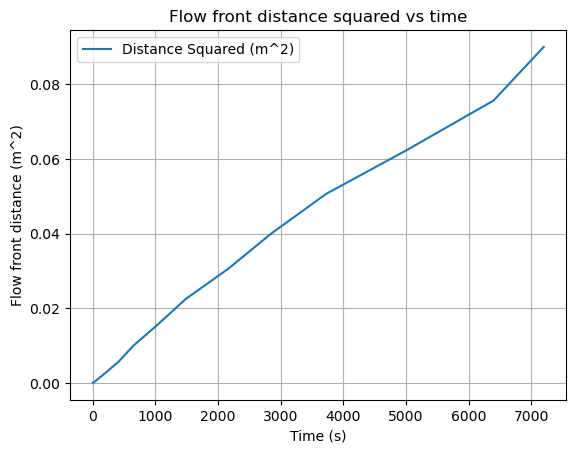

In [4]:
# Plot the DataFrame
df.plot(x="Time (s)", y=["Distance Squared (m^2)"], kind="line")

# Show the plot
plt.title("Flow front distance squared vs time")
plt.xlabel("Time (s)")
plt.ylabel("Flow front distance (m^2)")
plt.grid()
plt.show()

### 4. Find the slope of distance squared vs time
Fit a linear line to the distance squared vs time data

In [9]:
# Fit a linear model
slope, intercept = np.polyfit(df["Time (s)"], df["Distance Squared (m^2)"], 1)

# Print the slope and intercept
print(f"Slope: {slope}, Intercept: {intercept}")

Slope: 1.217959711184088e-05, Intercept: 0.002037704773292422


### 5. Define the parameters
Define the parameters of the experiment (material properties, pressure, etc.). These should be available in the lab manual and/or obtained during the lab session. 

In [6]:
#Define material parameters
#*keep an eye on units*

mu = 0.25 #Pa-S
rho_f = 2.66 #g/cm^3
AW = 0.02 #g/cm^2
n = 8 #plies
t = 0.13 #cm
delP = 101325 #Pa
m = slope


### 6. Calculate the fibre volume fraction and porosity
Use the equation derived above to calculate permeability

In [7]:
#Calculate fibre volume fraction and phi
# vf = #input equation to calculate Vf based on FAW, t, fibre density
# phi = #input equation for porosity

print("vf =", round(vf,2))
print("phi =", round(phi,2))

vf = 0.46
phi = 0.54


### 7. Calculate permeability

In [8]:
#Calculate permeability
# K = #input equation, refer to Equation (10)

print("K =", K, "m^2")

K = 8.07322476670822e-12 m^2


### 8. Report and submit your results
Now that you have completed the analysis you can write up your lab report and submit it. If you would like to include the code you used for your calculations then you can include them in the appendix.